# Face Detection System.

## Environment Setup 
Import Libraries.
- `os`: Provides functions to interact with the operating system, such as checking for file existence and directory navigation.
- `cv2`: OpenCV library, used for image processing tasks such as reading, converting, and detecting faces in images.
- `numpy (np)`: Essential for numerical computations, here used for handling image data arrays.
- `KNeighborsClassifier`: A machine learning classifier from sklearn that uses the k-Nearest Neighbors algorithm for face recognition.
- `pickle`: Used for saving and loading the trained model for reuse without retraining.

In [ ]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pickle

- `DATA_DIR`: Directory where training images are stored.
- `MODEL_FILE`: Path to the file where the trained KNN model will be saved.

In [ ]:
# Define paths
DATA_DIR = "./train_data"
MODEL_FILE = "face_recognition_model.pkl"

## Step 1: Preprocess images to create a dataset
- This function processes the images from `DATA_DIR` to create a dataset for training.
- `os.path.exists`: Checks if the directory with training images exists.
- `Haar Cascade Classifier`: A pre-trained face detection model provided by OpenCV.
- `X`: List to store image arrays (features).
- `y`: List to store labels.
- `os.listdir`: Lists all files in DATA_DIR.
- `cv2.imread`: Reads an image file.
- `cv2.cvtColor`: Converts the image to grayscale for better face detection performance.
- `detectMultiScale`: Detects faces in the grayscale image.
- `Extract Face`: Extracts the region of interest (face) from the grayscale image.
- `Resize`: Scales faces to a uniform size of 100x100 pixels.
- `Flatten`: Converts the 2D image into a 1D array.

In [1]:
# Preprocess images
def preprocess_images():
    if not os.path.exists(DATA_DIR):
        print(f"Error: Data directory '{DATA_DIR}' does not exist.")
        return []

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    X, y = [], []

    for idx, filename in enumerate(os.listdir(DATA_DIR)):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(DATA_DIR, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y_, w, h) in faces:
                face = gray[y_:y_ + h, x:x + w]
                face_resized = cv2.resize(face, (100, 100))  # Resize to consistent size
                X.append(face_resized.flatten())
                y.append(1)  # Label all faces as "1" for matching

    return np.array(X), np.array(y)

## Step 2: Training the Model
- Calls the `preprocess_images` function to retrieve the dataset.
- Initializes a `KNN model` with `3` neighbors.
- `fit()`: Trains the model using the dataset.
- `pickle.dump`: Saves the trained model to a file for reuse.

In [ ]:
# Train the face recognition model
def train_model():
    X, y = preprocess_images()
    if len(X) == 0:
        print("No images processed for training.")
        return

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    with open(MODEL_FILE, "wb") as f:
        pickle.dump(knn, f)

    print("Model trained and saved.")

## Step 3: Capture image and perform recognition
- `pickle.load`: Loads the saved KNN model.
- Opens the computer's camera.
- Converts each camera frame to grayscale and detects faces.
- Resizes and flattens the detected face to match the training data format.
- `predict()`: Predicts if the detected face matches the trained dataset.
- Provides feedback based on the prediction result.

In [2]:
# Capture image and perform recognition.
def capture_and_recognize():
    if not os.path.exists(MODEL_FILE):
        print("Error: Model file does not exist. Train the model first.")
        return

    with open(MODEL_FILE, "rb") as f:
        knn = pickle.load(f)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    cap = cv2.VideoCapture(0)

    print("Press 'c' to capture your image.")

    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        cv2.imshow("Face Detection", frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            if len(faces) == 0:
                print("No face detected. Try again.")
            else:
                for (x, y, w, h) in faces:
                    face = gray[y:y + h, x:x + w]
                    face_resized = cv2.resize(face, (100, 100)).flatten()
                    prediction = knn.predict([face_resized])[0]

                    if prediction == 1:
                        print("Face match found : Hello Sam!")
                    else:
                        print("No match found : Hello, Stranger!")

                break

        elif key == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

## Execution.
Calls the `train_model` and `capture_and_recognize` functions to perform training and recognition.

In [ ]:
# Main script
if __name__ == "__main__":
    train_model()
    capture_and_recognize()

# **Usage**
## Example : Case 1.

1. Clone the repository. Instructions in the `README.md` file.
2. Open your text editor, eg Visual Studio Code.
3. Create a virtual environment - `python -m venv venv`
4. Activate virtual environment - `Linux : source venv/bin/activate`

                                Windows : venv\Scripts\activate
5. Install dependencies - `pip install -r requirements.txt`
6. Run the : `python face_detector.py` script.

### The camera is opened.
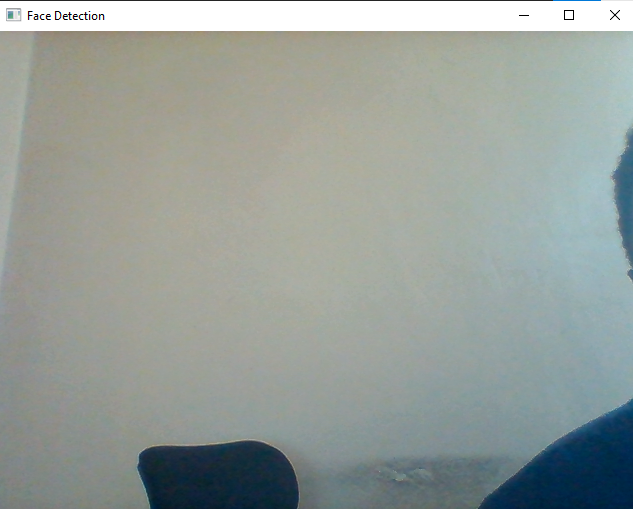

### Face detection in real time by drawing the rectangular boxes.


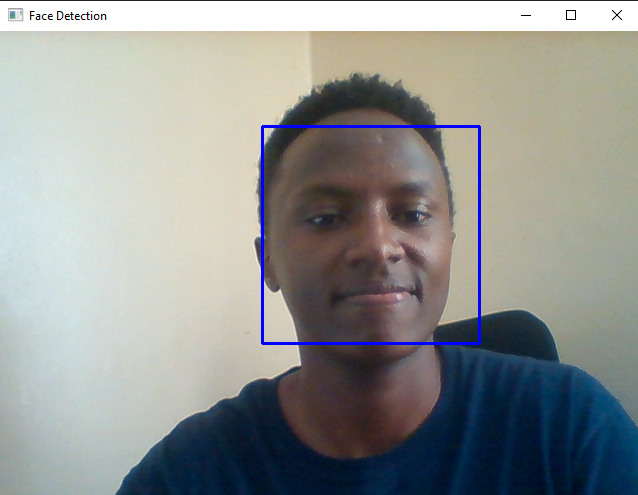

Press `c` on your keyboard to capture the image.

### If a match is found.

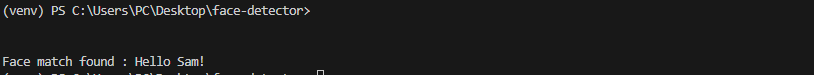